<a href="https://colab.research.google.com/github/SukanyaPathak2904/Upvotes-prediction/blob/main/upvotes3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [17]:
dftrain = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/upvotesprediction/train_NIR5Yl1.csv')
dftest = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/upvotesprediction/test_8i3B3FC.csv')

In [4]:
dftrain.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [18]:
dftrain.drop(['ID','Tag','Username'],axis=1,inplace=True)

In [5]:
dftrain.shape

(330045, 7)

In [19]:
dftrain = dftrain[dftrain['Views']!=0]
dftrain = dftrain[dftrain['Answers']!=0]
dftrain = dftrain[dftrain['Reputation']!=0]
dftrain = dftrain[dftrain['Upvotes']!=0]

In [ ]:
dftrain.shape

(314597, 4)

In [ ]:
sns.scatterplot(x=dftrain['Views'], y = dftrain['Upvotes'],data = dftrain)

In [ ]:
dftrain['Upvotes'].mean()

348.7565330179682

<Axes: xlabel='Upvotes'>

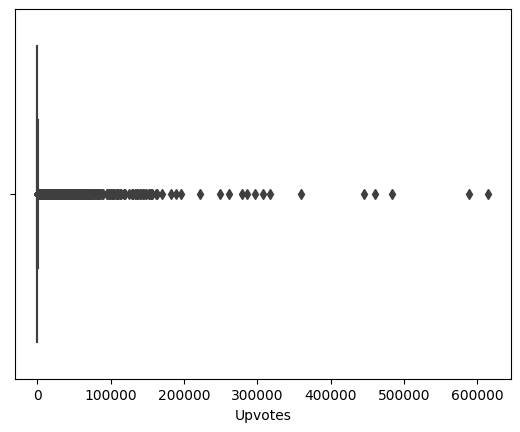

In [15]:
sns.boxplot(data = dftrain,x = dftrain['Upvotes'])

In [20]:
dftrain = dftrain[dftrain['Views']<=4000000]
dftrain = dftrain[dftrain['Answers']<=50]
dftrain = dftrain[dftrain['Reputation']<=800000]
dftrain = dftrain[dftrain['Upvotes']!=0]

In [ ]:
dftrain.shape


(314556, 4)

In [ ]:
dftrain.head()

,Reputation,Answers,Views,Upvotes
0,3942.0,2.0,7855.0,42.0
1,26046.0,12.0,55801.0,1175.0
2,1358.0,4.0,8067.0,60.0
3,264.0,3.0,27064.0,9.0
4,4271.0,4.0,13986.0,83.0


In [21]:
dftrain['Reputation'] = dftrain['Reputation'].astype(int)
dftrain['Answers'] = dftrain['Answers'].astype(int)
dftrain['Views'] = dftrain['Views'].astype(int)
dftrain['Upvotes'] = dftrain['Upvotes'].astype(int)

In [ ]:
dftrain.head()

,Reputation,Answers,Views,Upvotes
0,3942,2,7855,42
1,26046,12,55801,1175
2,1358,4,8067,60
3,264,3,27064,9
4,4271,4,13986,83


In [22]:
x = dftrain.drop('Upvotes',axis=1)
y = dftrain['Upvotes']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.metrics import mean_squared_error,precision_score
from sklearn.linear_model import LassoLars

###Histgradient

In [24]:
hgr = HistGradientBoostingRegressor(max_iter = 500,max_leaf_nodes=92,learning_rate= 0.6,max_depth = 15)

In [25]:
hgr.fit(X_train,y_train)

pred = hgr.predict(X_test)

In [ ]:
y_test[:11]

172220      8
271592      8
60957      30
216840    476
55074       7
235282     29
151865     17
244367     44
256342     23
231496     30
329413     82
Name: Upvotes, dtype: int64

In [ ]:
pred[:11]

array([  7.90696561,  30.16238924,  39.36162715, 341.00335642,
         9.97900471,  16.01666281,  18.67671131,  28.69973911,
        82.88868698,   9.97900471,  22.73864453])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse    #2007 2043 2109 2111 2018,2003,1996,1985

2169.229140632051

###Cross Validation

In [26]:
cv_results_hg = cross_validate(hgr, X_train, y_train, cv=10, return_estimator=True)

In [27]:
cv_results_hg['test_score'].mean()

0.7245502492877273

In [ ]:
gtest_score = []
for i in range(len(cv_results_hg['estimator'])):
  gtest_score.append(cv_results_hg['estimator'][i].score(X_test, y_test))
  cross_validate['estimator']

In [ ]:
sum(gtest_score) / len(gtest_score)

0.7050848942220568

In [ ]:
cv_results_hg['test_score']

array([0.66793539, 0.80791668, 0.68816865, 0.78516811, 0.59310297,
       0.7326789 , 0.75284616, 0.81032699, 0.86331877, 0.54088433])

In [ ]:
result = []
for i in range(len(cv_results_hg['estimator'])):
  result.append(int(cv_results_hg['estimator'][i].predict(X_test.iloc[:1])))

In [ ]:
result

[6, 8, 11, 8, 9, 7, 7, 9, 8, 7]

In [ ]:

max(set(result), key=result.count)

7

In [ ]:
y_test.iloc[0]

8

### random forest regressor

In [ ]:
rfr = RandomForestRegressor(n_estimators = 285,max_depth = 32,min_samples_split = 4)

In [ ]:
rfr.fit(X_train,y_train)

pred1 = rfr.predict(X_test)

In [ ]:
y_test[:10]

172220      8.0
271592      8.0
60957      30.0
216840    476.0
55074       7.0
235282     29.0
151865     17.0
244367     44.0
256342     23.0
231496     30.0
Name: Upvotes, dtype: float64

In [ ]:
pred1[:10]

array([  3.302218  ,  19.45999555,  39.7344875 , 378.0357425 ,
        11.33832289,  15.50922525,  26.24772618,  30.90178995,
        49.35969271,   9.90941121])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pred1))
rmse   #1322.02(260,27,4)         1342(250,25,4)        1361.42(280,30,5)     1366.07(270,27,4)     1366.19(250,25,4)       1377 (280,30,6)         1387.81(270,30,4)

1361.4242699432002

###Cross validation

In [ ]:
cv_results = cross_validate(rfr,X_train,y_train,cv= 10,return_estimator= True)

In [ ]:
cv_results['test_score'].mean()

0.7263270471978427

In [ ]:
gtest_score = []
for i in range(len(cv_results['estimator'])):
    gtest_score.append(cv_results['estimator'][i].score(X_test,y_test))

sum(gtest_score)/ len(gtest_score)

In [ ]:
result = []
for i in range(len(cv_results['estimator'])):
    result.append(  cv_results['estimator'][i].predict(X_test))

result

In [ ]:
max(result)


###Decision Tree regressor(cross validation)

In [ ]:
dt = DecisionTreeRegressor(splitter= 'random')

In [ ]:
cv_results_dt = cross_validate(dt, X_train, y_train, cv=10, return_estimator=True)

In [ ]:
cv_results_dt['test_score'].mean()

0.6807130139108553

In [ ]:
cv_results_dt['test_score']

array([0.62877674, 0.72831889, 0.81899758, 0.81225415, 0.50343454,
       0.87686391, 0.6233326 , 0.79684391, 0.52505224, 0.49325557])

In [ ]:
gtest_score = []
for i in range(len(cv_results['estimator'])):
  gtest_score.append(cv_results['estimator'][i].score(X_test, y_test))

In [ ]:
sum(gtest_score) / len(gtest_score)

0.7641509052135754

In [ ]:
result = []
for i in range(len(cv_results['estimator'])):
  result.append(int(cv_results['estimator'][i].predict(X_test.iloc[:1])))
  #result.append(int(cv_results['estimator'][i].predict(X_test.iloc[:1])))



In [ ]:
result

[2, 2, 5, 2, 1, 3, 3, 5, 1, 5]

In [ ]:
max(set(result), key=result.count)

2

In [ ]:
y_test.iloc[0]

8.0

###Checking how cross val works

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(splitter='random')

In [ ]:
scores = cross_val_score(dt, X_train, y_train, cv=10)
scores.mean()

0.7332702848054516

In [ ]:
pred2 = dt.predict(X_test)

In [ ]:
pred2[:10]

array([  5.,  15.,  15., 267.,  10.,  14.,  53.,  33.,  52.,  23.])

In [ ]:
y_test[:10]

172220      8.0
271592      8.0
60957      30.0
216840    476.0
55074       7.0
235282     29.0
151865     17.0
244367     44.0
256342     23.0
231496     30.0
Name: Upvotes, dtype: float64

###ExtraTree regressor cross val

In [ ]:
etr = ExtraTreeRegressor(splitter = 'best')

cv_results = cross_validate(etr,X_train,y_train, cv = 10,return_estimator = True)

In [ ]:
cv_results['test_score'].mean()

0.7481358661302897

In [ ]:
gtest_score=[]
for i in range(len(cv_results['estimator'])):
    gtest_score.append(cv_results['estimator'][i].score(X_test,y_test))

In [ ]:
gtest_score

[0.8642694712049832,
 0.8656153588199593,
 0.8651100779485321,
 0.8589019989821245,
 0.7583783287804065,
 0.8073829317193782,
 0.8526380812166785,
 0.8581989564378034,
 0.8023679043231577,
 0.8720550983942401]

In [ ]:
sum(gtest_score)/len(gtest_score)

0.8404918207827266

In [ ]:
result = []
for i in range(len(cv_results['estimator'])):
     result.append( cv_results['estimator'][i].predict(X_test.iloc[:1]))

result

[array([2.]),
 array([3.]),
 array([2.]),
 array([5.]),
 array([2.]),
 array([5.]),
 array([2.]),
 array([2.]),
 array([5.]),
 array([1.])]

In [ ]:
y_test[:1]

172220    8
Name: Upvotes, dtype: int64

###XGB

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_estimators = 150)

In [ ]:
xgb.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)>

In [ ]:
cv_results_rgb = cross_validate(xgb,X_train, y_train, cv = 10,return_estimator= True)

In [ ]:
cv_results_rgb['test_score']

array([0.74692608, 0.87689068, 0.90223471, 0.84004112, 0.65479304,
       0.82924311, 0.913051  , 0.84998505, 0.89982217, 0.63789493])

###KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
kn = KNeighborsRegressor()

In [ ]:
cv_results_las = cross_validate(kn, X_train, y_train, cv= 10, return_estimator= True)

In [ ]:
cv_results_las['test_score']

array([0.85401486, 0.69493504, 0.89447622, 0.82041601, 0.60211428,
       0.50739545, 0.68333152, 0.7525532 , 0.87357179, 0.74986447])

###Test data

In [ ]:
dftest.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [ ]:
dftest.drop(['ID', "Username","Tag"], axis=1, inplace =True)

In [ ]:
dftest['Reputation'] = dftest['Reputation'].astype(int)
dftest['Answers'] = dftest['Answers'].astype(int)
dftest['Views'] = dftest['Views'].astype(int)

In [ ]:
dftest.head()

,Reputation,Answers,Views
0,5645,3,33200
1,24511,6,2730
2,927,1,21167
3,21,6,18528
4,4475,10,57240


In [ ]:
cv_results_hg['test_score']

array([0.66793539, 0.80791668, 0.68816865, 0.78516811, 0.59310297,
       0.7326789 , 0.75284616, 0.81032699, 0.86331877, 0.54088433])

In [ ]:
# evaluating results for histgradient model
result1 = []
result1.append( cv_results_hg['estimator'][8].predict(dftest))

In [ ]:
for i in result1:
    list(i)

In [ ]:
i[:10]

array([289.32601574,  62.31828532,  43.68002229,  28.69567084,
       342.11667166,  18.33267643,  16.87892621, 104.07432756,
        72.34555136,  16.87892621])

In [ ]:
dfsub = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/upvotesprediction/sample_submission_OR5kZa5.csv')

In [ ]:
dfsub.head()

,ID,Upvotes
0,7,289.0
1,9,62.0
2,12,44.0
3,13,29.0
4,16,342.0


In [ ]:
dfsub.drop('Upvotes',axis=1,inplace = True)

In [ ]:
dfsub.rename(columns = {"Upvotess": "Upvotes"},inplace =True)

In [ ]:
dfsub.to_csv('dfsubmit_upvotes.csv',index = False)   #rank 1235        score - 5024.56

In [ ]:
dftest.head()

,Reputation,Answers,Views
0,5645,3,33200
1,24511,6,2730
2,927,1,21167
3,21,6,18528
4,4475,10,57240


In [ ]:
# evaluating results for descision tree model

result2 = []
result2.append( cv_results_dt['estimator'][5].predict(dftest))

In [ ]:
for i in result2:
    list(i)

In [ ]:
dfsub = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/upvotesprediction/sample_submission_OR5kZa5.csv')

In [ ]:
dfsub.drop('Upvotes',axis=1,inplace =True)

In [ ]:
dfsub['Upvotes'] =i

In [ ]:
dfsub.head()

,ID,Upvotes
0,7,217.0
1,9,141.0
2,12,29.0
3,13,4.0
4,16,430.0


In [ ]:
dfsub.to_csv('dfsubmit2.csv',index = False)      #5888.89

In [ ]:
#  evaluating with xgb regressor model

result3 = []
result3.append( cv_results_rgb['estimator'][6].predict(dftest))


In [ ]:
for i in result3:
    list(i)

In [ ]:
dfsub = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/upvotesprediction/sample_submission_OR5kZa5.csv')

In [ ]:
dfsub.drop('Upvotes',axis=1,inplace=True)
dfsub['Upvotes'] = i

In [ ]:
dfsub.head()

,ID,Upvotes
0,7,248.620438
1,9,99.788811
2,12,45.487831
3,13,20.167700
4,16,283.916443


In [ ]:
dfsub['Upvotes'] = round(dfsub['Upvotes'],0)

In [ ]:
dfsub.head()

,ID,Upvotes
0,7,249.0
1,9,100.0
2,12,45.0
3,13,20.0
4,16,284.0


In [ ]:
dfsub.to_csv('dfsubmit3.csv',index = False)

In [ ]:
cv_results_las = cross_validate(las,X_)

###post

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [ ]:
dftrain = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/upvotesprediction/train_NIR5Yl1.csv')
dftest = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/upvotesprediction/test_8i3B3FC.csv')

In [ ]:
dftrain.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [ ]:
dftrain.drop(['ID','Tag','Username'],axis=1,inplace=True)

In [ ]:
dftrain.shape

(330045, 4)

In [ ]:
dftrain = dftrain[dftrain['Views']!=0]
dftrain = dftrain[dftrain['Answers']!=0]
dftrain = dftrain[dftrain['Reputation']!=0]
dftrain = dftrain[dftrain['Upvotes']!=0]

In [ ]:
dftrain.shape

(314597, 4)

In [ ]:
sns.scatterplot(x=dftrain['Views'], y = dftrain['Upvotes'],data = dftrain)

In [ ]:
dftrain['Upvotes'].mean()

353.2841730849309

In [ ]:
dftrain = dftrain[dftrain['Views']<=4000000]
dftrain = dftrain[dftrain['Answers']<=50]
dftrain = dftrain[dftrain['Reputation']<=800000]
dftrain = dftrain[dftrain['Upvotes']<=300000]

In [ ]:
dftrain['Reputation'] = dftrain['Reputation'].astype(int)
dftrain['Answers'] = dftrain['Answers'].astype(int)
dftrain['Views'] = dftrain['Views'].astype(int)
dftrain['Upvotes'] = dftrain['Upvotes'].astype(int)

In [ ]:
x = dftrain.drop('Upvotes',axis=1)
y = dftrain['Upvotes']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=31)

In [ ]:
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.metrics import mean_squared_error,precision_score
from sklearn.linear_model import LassoLars

In [ ]:
hgr = HistGradientBoostingRegressor(max_iter = 530,max_leaf_nodes= 100, learning_rate= 0.7,max_depth = 40)

In [ ]:
hgr.fit(X_train,y_train)

pred = hgr.predict(X_test)

In [ ]:
pred = pred.astype(int)

In [ ]:
y_test[:11]

169197      8
44431     142
250894      1
238637     41
38197      41
35129      47
220837     44
265517    363
302524      4
51624      33
15495      49
Name: Upvotes, dtype: int64

In [ ]:
pred[:11]

array([ 19, 177,  12,  36,  24,  24,  30, 492,  11,  44,  20])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

1599.446962219144

cross validate:
it is basically a resampling method where it takes different part of data to test and train the model on diffrent iterations. what it does is basically divide the data in to multiple folds and use of it as validation set and otjer to train the data.

In [ ]:
cv_results_hg = cross_validate(hgr, X_train, y_train, cv=10, return_estimator=True)

In [ ]:
cv_results_hg['test_score'].mean()

0.7642394350838

In [ ]:
cv_results_hg['test_score']

array([0.70810113, 0.64279106, 0.8630263 , 0.75072912, 0.80808086,
       0.77014573, 0.81488533, 0.8041389 , 0.66977024, 0.81072567])

In [ ]:
gtest_score = []
for i in range(len(cv_results_hg['estimator'])):
  gtest_score.append(cv_results_hg['estimator'][i].score(X_test, y_test))

In [ ]:
sum(gtest_score) / len(gtest_score)

0.7472792705476771

In [ ]:
cv_results_hg['test_score']

array([0.70810113, 0.64279106, 0.8630263 , 0.75072912, 0.80808086,
       0.77014573, 0.81488533, 0.8041389 , 0.66977024, 0.81072567])

In [ ]:
result = []
for i in range(len(cv_results_hg['estimator'])):
  result.append(int(cv_results_hg['estimator'][i].predict(X_test.iloc[:1])))

In [ ]:
result

In [ ]:
max(set(result), key=result.count)

In [ ]:
y_test.iloc[0]

In [ ]:
dftest['Reputation'] = dftest['Reputation'].astype(int)
dftest['Answers'] = dftest['Answers'].astype(int)
dftest['Views'] = dftest['Views'].astype(int)


In [ ]:
cv_results_hg['test_score']

array([0.70810113, 0.64279106, 0.8630263 , 0.75072912, 0.80808086,
       0.77014573, 0.81488533, 0.8041389 , 0.66977024, 0.81072567])

In [ ]:
# evaluating results for histgradient model
result1 = []
result1.append( cv_results_hg['estimator'][2].predict(dftest))

In [ ]:
for i in result1:
    list(i)


In [ ]:
i[:10]

array([250.69252377,  68.09304388,  28.68890027,  21.75314821,
       338.19353669,   9.8814471 ,  28.86169877,  87.8153946 ,
        49.7534053 ,  21.92594671])